In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

In [44]:
raw_data = pd.read_csv('1.04.+Real-life+example.csv')
raw_data.sample(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
1351,Mercedes-Benz,31000.0,crossover,220,3.2,Diesel,yes,2008,GL 320
1676,Toyota,97500.0,crossover,2,4.6,Petrol,yes,2016,Land Cruiser 200
3019,Mercedes-Benz,23900.0,sedan,96,3.5,Petrol,yes,2009,S 350
3915,BMW,4500.0,vagon,360,2.0,Petrol,yes,1993,520
1567,Mercedes-Benz,9350.0,van,160,2.2,Diesel,yes,2008,Vito
4129,Volkswagen,14900.0,van,170,1.6,Diesel,yes,2012,Touran
2968,Mercedes-Benz,10999.0,van,191,2.2,Diesel,yes,2007,Vito
1555,Audi,15000.0,sedan,168,NaN,Other,yes,2007,A6
2100,Mitsubishi,8200.0,crossover,210,2.4,Gas,yes,2007,Outlander
268,Toyota,35500.0,crossover,85,3.0,Diesel,yes,2012,Land Cruiser Prado


In [45]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [46]:
data = raw_data.drop(['Registration'], axis = 1)
data.head(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,2011,Rav 4
5,Mercedes-Benz,199999.0,crossover,0,5.5,Petrol,2016,GLS 63
6,BMW,6100.0,sedan,438,2.0,Gas,1997,320
7,Audi,14200.0,vagon,200,2.7,Diesel,2006,A6
8,Renault,10799.0,vagon,193,1.5,Diesel,2012,Megane
9,Volkswagen,1400.0,other,212,1.8,Gas,1999,Golf IV


In [47]:
data.isnull().sum()

Brand            0
Price          172
Body             0
Mileage          0
EngineV        150
Engine Type      0
Year             0
Model            0
dtype: int64

In [48]:
data_no_mv = data.dropna(axis = 0)
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,2012.000000,NaN


C:\Users\alexp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

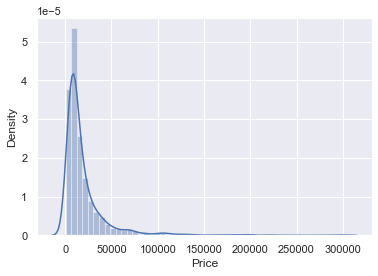

In [49]:
sns.distplot(data_no_mv['Price'])

In [50]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year,Model
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984.000000,3984
unique,7,NaN,6,NaN,NaN,4,NaN,302
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN,E-Class
freq,880,NaN,1528,NaN,NaN,1853,NaN,188
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,2006.292922,NaN
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,6.672745,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,1969.000000,NaN
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,2002.750000,NaN
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,2007.000000,NaN
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,2011.000000,NaN


C:\Users\alexp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

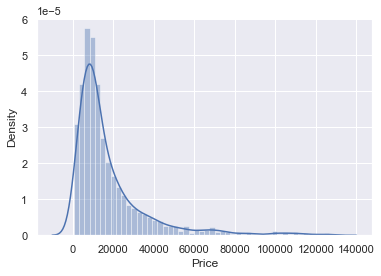

In [51]:
sns.distplot(data_1['Price'])

C:\Users\alexp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

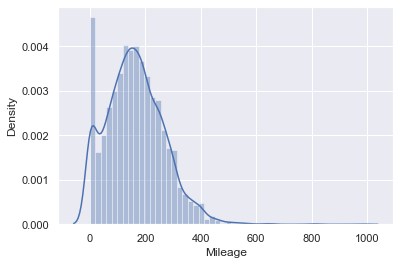

In [52]:
sns.distplot(data_no_mv['Mileage'])

In [53]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]


C:\Users\alexp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

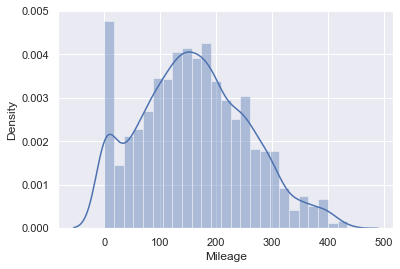

In [54]:
sns.distplot(data_2['Mileage'])

C:\Users\alexp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

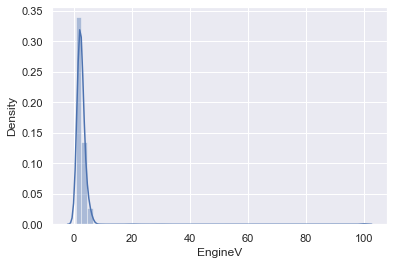

In [55]:
sns.distplot(data_no_mv['EngineV'])

C:\Users\alexp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

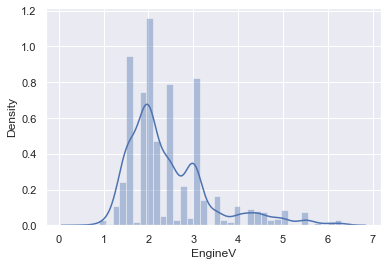

In [56]:
data_3 = data_2[data_2['EngineV']<6.5]
sns.distplot(data_3['EngineV'])

C:\Users\alexp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

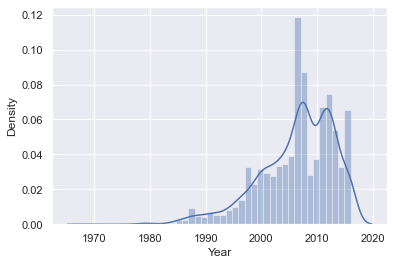

In [57]:
sns.distplot(data_no_mv['Year'])

C:\Users\alexp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

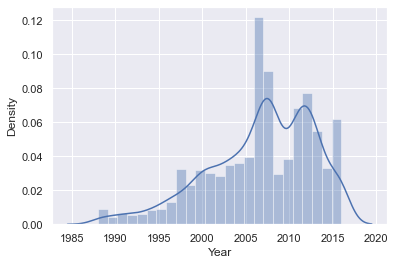

In [58]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]
sns.distplot(data_4['Year'])

In [59]:
data_cln = data_4.reset_index(drop=True)
data_cln.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year,Model
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867.000000,3867
unique,7,NaN,6,NaN,NaN,4,NaN,291
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN,E-Class
freq,848,NaN,1467,NaN,NaN,1807,NaN,181
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,2006.709853,NaN
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,6.103870,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,1988.000000,NaN
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,2003.000000,NaN
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,2012.000000,NaN


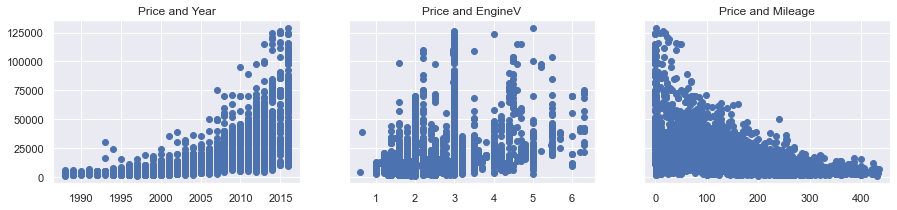

In [60]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cln['Year'],data_cln['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cln['EngineV'],data_cln['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cln['Mileage'],data_cln['Price'])
ax3.set_title('Price and Mileage')


plt.show()

C:\Users\alexp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

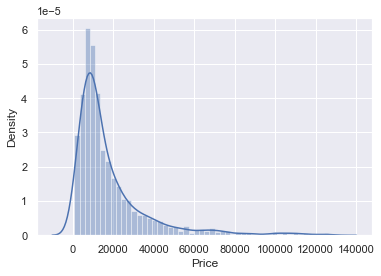

In [61]:
sns.distplot(data_cln['Price'])

In [62]:
log_price = np.log(data_cln['Price'])
data_cln['log_price'] = log_price
data_cln

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year,Model,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,1991,320,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,1999,Sprinter 212,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,2003,S 500,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,2007,Q7,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,2011,Rav 4,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,2008,T5 (Transporter),9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,2014,Corolla,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,2014,S 350,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,1999,535,8.779557


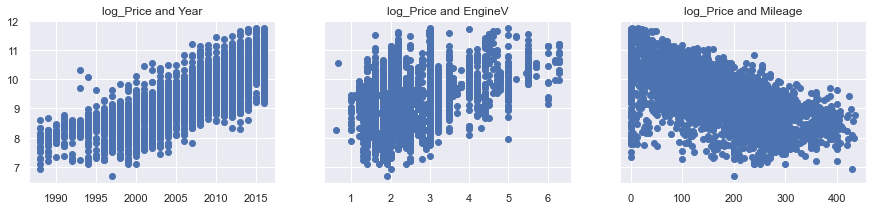

In [63]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cln['Year'],data_cln['log_price'])
ax1.set_title('log_Price and Year')
ax2.scatter(data_cln['EngineV'],data_cln['log_price'])
ax2.set_title('log_Price and EngineV')
ax3.scatter(data_cln['Mileage'],data_cln['log_price'])
ax3.set_title('log_Price and Mileage')


plt.show()

In [64]:
data_cln = data_cln.drop(['Price'], axis=1)                    

In [65]:
data_cln.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type', 'Year',
       'Model', 'log_price'], dtype=object)

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cln[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [69]:
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [74]:
data_no_multic = data_cln.drop(['Year'], axis=1)

In [75]:
# creazione dei dummies
data_dummies = pd.get_dummies(data_no_multic, drop_first=True)

In [76]:
data_dummies.sample(10)

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
84,405,2.00,8.294050,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3238,140,3.00,10.545078,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
654,215,1.90,8.294050,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2229,170,1.00,8.444622,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
167,5,0.65,10.568441,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2603,40,2.00,9.464983,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1576,122,1.80,9.852142,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
872,85,4.00,10.221941,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1649,135,1.50,9.047821,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
432,1,3.00,9.268609,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
data_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Model_100', 'Model_11',
       'Model_116', 'Model_118', 'Model_120', 'Model_19', 'Model_190',
       'Model_200', 'Model_210', 'Model_220', 'Model_230', 'Model_25',
       'Model_250', 'Model_300', 'Model_316', 'Model_318', 'Model_320',
       'Model_323', 'Model_325', 'Model_328', 'Model_330', 'Model_335',
       'Model_4 Series Gran Coupe', 'Model_428', 'Model_4Runner',
       'Model_5 Series', 'Model_5 Series GT', 'Model_520', 'Model_523',
       'Model_524', 'Model_525', 'Model_528', 'Model_530', 'Model_535',
       'Model_540', 'Model_545', 'Model_550', 'Model_6 Series Gran Coupe',
       'Model_630', 'Model_640', 'Model_645', 'Model_650', 'Model_730',
       'Model_735', 'Mo

In [81]:
cols = ['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol',]

In [83]:
data_preprocessed = data_dummies[cols]
data_preprocessed.head(10)

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,277,2.00,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,427,2.90,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,358,5.00,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,240,4.20,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,120,2.00,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1
5,200,2.70,9.560997,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,193,1.50,9.287209,0,0,0,1,0,0,0,0,0,1,0,0,0,0
7,212,1.80,7.244228,0,0,0,0,0,1,0,1,0,0,0,1,0,0
8,177,1.50,9.388487,0,0,0,1,0,0,0,0,0,1,0,0,0,0
9,260,1.79,7.824046,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [86]:
x = data_preprocessed.drop(['log_price'], axis=1)
y = data_preprocessed['log_price']

In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
ss = StandardScaler()
ss.fit(x)

StandardScaler()

In [91]:
x_scaled = ss.transform(x)

In [92]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=0)

In [93]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [94]:
y_hat = lr.predict(x_train)

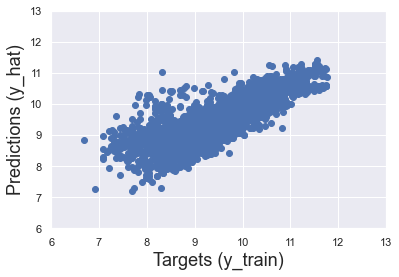

In [100]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals')

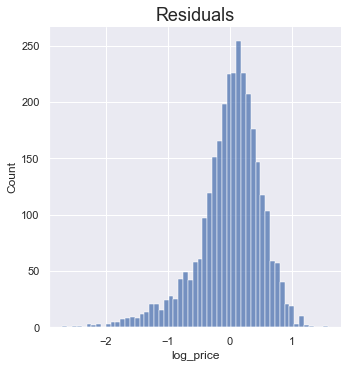

In [101]:
sns.displot(y_train - y_hat)
plt.title('Residuals', size=18)

In [102]:
lr.score(x_train,y_train)

0.6443518162691491

In [103]:
lr.intercept_

9.4158373748478

In [104]:
lr.coef_

array([-0.53706803,  0.22865557,  0.03078841,  0.0595422 , -0.10302278,
       -0.12955903, -0.01408464, -0.02586651, -0.16806138, -0.09599064,
       -0.21504634, -0.15281763, -0.12337204, -0.07253399, -0.02794891,
       -0.09686913])

In [105]:
lr_summary = pd.DataFrame(x.columns.values, columns=['Features'])
lr_summary['Weights'] = lr.coef_
lr_summary


,Features,Weights
0,Mileage,-0.537068
1,EngineV,0.228656
2,Brand_BMW,0.030788
3,Brand_Mercedes-Benz,0.059542
4,Brand_Mitsubishi,-0.103023
5,Brand_Renault,-0.129559
6,Brand_Toyota,-0.014085
7,Brand_Volkswagen,-0.025867
8,Body_hatch,-0.168061
9,Body_other,-0.095991


In [106]:
#testing

In [107]:
y_hat_test = lr.predict(x_test)

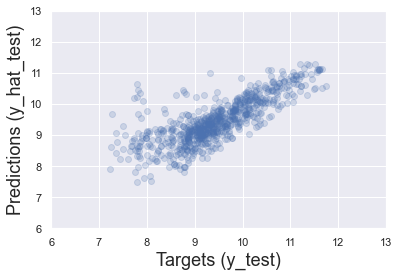

In [109]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [111]:
#usare pd.DataFrame(np.exp(y_hat_test), columns=['Predictions']) per trasformare il risultato dei prezzi da logaritmici a originali come nel primo dataset
data_tests = pd.DataFrame(y_hat_test, columns=['Prediction'])
data_tests.sample(10)

,Prediction
508,9.332420
556,8.100424
130,10.799342
761,9.443894
351,9.833344
389,10.212696
0,9.440931
327,10.908420
773,11.093801
179,9.261013


In [113]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0     9.287301
1    10.609057
2     9.277999
3     9.259131
4     9.169518
Name: log_price, dtype: float64

In [114]:
data_tests['y'] = np.exp(y_test)
data_tests

,Prediction,y
0,9.440931,10800.0
1,10.457382,40500.0
2,9.099317,10700.0
3,8.261503,10500.0
4,9.583787,9600.0
...,...,...
769,10.428051,40800.0
770,9.184695,8100.0
771,9.260894,6500.0
772,9.809307,24996.0


In [115]:
data_tests['Residuals'] = data_tests['y'] - data_tests['Prediction']
data_tests['Difference%'] = np.absolute(data_tests['Residuals']/data_tests['y']*100)
data_tests

,Prediction,y,Residuals,Difference%
0,9.440931,10800.0,10790.559069,99.912584
1,10.457382,40500.0,40489.542618,99.974179
2,9.099317,10700.0,10690.900683,99.914960
3,8.261503,10500.0,10491.738497,99.921319
4,9.583787,9600.0,9590.416213,99.900169
...,...,...,...,...
769,10.428051,40800.0,40789.571949,99.974441
770,9.184695,8100.0,8090.815305,99.886609
771,9.260894,6500.0,6490.739106,99.857525
772,9.809307,24996.0,24986.190693,99.960756


In [116]:
data_tests.describe()

,Prediction,y,Residuals,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,9.439258,18851.310736,18841.871479,99.895318
std,0.723440,20020.440882,20019.898803,0.096313
min,7.481317,1389.000000,1381.094432,99.334024
25%,8.955698,7200.000000,7190.852209,99.876588
50%,9.356681,11525.000000,11515.652212,99.919262
75%,9.938951,22900.000000,22889.996794,99.956369
max,11.275803,125000.000000,124989.431926,99.991546


In [117]:
data_tests.sort_values(by=['Difference%'])

,Prediction,y,Residuals,Difference%
89,9.656649,1450.0,1440.343351,99.334024
241,8.618344,1400.0,1391.381656,99.384404
69,9.055710,1550.0,1540.944290,99.415761
385,7.905568,1389.0,1381.094432,99.430845
88,8.765133,1600.0,1591.234867,99.452179
...,...,...,...,...
131,11.101924,109999.0,109987.898076,99.989907
407,11.106742,111999.0,111987.893258,99.990083
433,11.106742,114999.0,114987.893258,99.990342
23,10.523141,116500.0,116489.476859,99.990967


In [119]:
y_predict = lr.predict(x_test)
y_predict

array([ 9.44093091, 10.45738153,  9.0993173 ,  8.26150261,  9.5837872 ,
        9.11217221,  8.49015311,  8.56457874, 10.11108416,  8.28607887,
        9.37347962,  8.9148367 ,  8.41721117,  8.92293721,  9.30875692,
        8.97975048, 10.30346446,  9.57315406,  9.83785021, 10.56399103,
        9.14978979,  8.22300792, 10.4457335 , 10.52314055,  9.42713949,
       10.19684679, 10.13181478, 10.91416628,  9.36383205, 10.2609744 ,
       10.32149143, 10.95035766,  9.33737005, 11.09597577,  8.15486226,
       10.58039012,  9.43109736,  9.80047298,  8.26731646,  8.4738514 ,
       10.27988532,  8.8939841 ,  9.38924787, 10.48400031,  8.25282525,
        8.6322665 , 11.14662081,  8.15954321,  8.77829907, 10.1490714 ,
        9.1826429 ,  9.05763558,  9.54156763,  9.7493832 ,  8.67504739,
        9.48718205,  9.17697958,  9.46914394,  9.36373995,  8.94679818,
        8.9276139 ,  9.27796775,  9.69680076, 10.50719862,  9.51710289,
        9.26526052, 10.73011221,  9.04877566,  8.86961284,  9.05